# Лабораторная работа №1 (Пономарева А.Ю., группа БПМ-151)

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from sympy import *

%matplotlib inline

# Задача 2.1. 
Даны два уравнения  $f(x)=0$ и $g(x)=0$. Найти с точностью $\varepsilon=10^{-10}$ все корни уравнений, содержащиеся на отрезке $[a, b]$. Для решения  задачи использовать  метод бисекции.

<br>
$f(x) = (\lg x)^2-\lg x -3/4$
<br>
$g(x) = (\lg x)^2-3\lg x +9/4$
<br>
$[a, b] = [0.1, 35]$

# Теория

Метод бисекции (или метод деления отрезка пополам) — простейший численный метод для решения нелинейных уравнений вида $f(x)=0.$ Предполагается только непрерывность функции $f(x)$. Поиск основывается на теореме о промежуточных значениях.

### Описание метода

Пусть требуется с заданной точностью $\varepsilon > 0$ найти корень $\bar{x}$ уравнения $f(x)=0$. Отрезок локализации $[a, b]$ (т.е. отрезок, содержащий только один корень $\bar{x}$) будем считать заданным. Предположим, что функция $f$ непрерына на отрезке $[a, b]$ и на его концах принимает значения разных знаков, т.е. $f(a) \cdot f(b) < 0$.

Для дальнейшего будет удобно обозначить отрезок $[a, b]$ через $[a^{(0)}, b^{(0)}]$. Примем за приближенное значение корня середину отрезка - точку $x^{(0)} = \cfrac{a^{(0)} + b^{(0)}}{2}$. Так как положение корня $\bar{x}$ на отрезке $[a^{(0)}, b^{(0)}]$ неизвестно, то можно лишь утверждать, что погрешность этого приближения не превышает половины длины отрезка: $\vert x^{(0)} - \bar{x}\vert \leqslant \cfrac{b^{(0)}-a^{(0)}}{2}$.

Уменьшить погрешность приближения можно, уточнив отрезок локализации, т.е. заменив начальный отрезок $[a^{(0)}, b^{(0)}]$ отрезком $[a^{(1)}, b^{(1)}]$ меньшей длины. Согласно *методу бисекции (половинного деления)* в качестве $[a^{(1)}, b^{(1)}]$ берут тот из отрезков $[a^{(0)}, x^{(0)}]$ и $[x^{(0)}, b^{(0)}]$, на концах которого выполняется условие $f(a^{(1)}) \cdot f(b^{(1)}) \leqslant 0$. Этот отрезок содержит искомый корень. Действительно, если $f(a^{(1)}) \cdot f(b^{(1)}) < 0$, то наличие корня следует из теоремы:

#### Пусть функция $f$ непрерывна на отрезке $[a, b]$ и принимает на его концах значения разных знаков, т.е. $f(a) \cdot f(b) < 0$. Тогда отрезок $[a, b]$ содержит по крайней мере один корень уравнения $f(x)=0$.


Если же $f(a^{(1)}) \cdot f(b^{(1)}) = 0$, то корнем является один из концов отрезка. 

Середина полученного отрезка $x^{(1)} = \cfrac{a^{(1)}+b^{(1)}}{2}$ дает теперь приближение к корню, оценка погрешности которого составляет $\vert x^{(1)} - \bar{x}\vert \leqslant \cfrac{b^{(1)}-a^{(1)}}{2} = \cfrac{b-a}{2^2}$.

За очередное уточнение отрезка локализации $[a^{(2)}, b^{(2)}]$ снова берут тот из отрезков $[a^{(1)}, x^{(1)}]$, $[x^{(1)}, b^{(1)}]$, на концах которого выполняется условие $f(a^{(2)}) \cdot f(b^{(2)}) \leqslant 0$.

Опишем очередную $(n+1)$-ю итерацию метода. Пусть отрезок $[a^{(n)}, b^{(n)}]$ уже найден и вычислены значения $x^{(n)}, f(a^{(n)}), f(b^{(n)})$. Тогда производят следующие действия:

$1^{\circ}$. Вычисляют $f(x^{(n)})$.

$2^{\circ}$. Если $f(a^{(n)}) \cdot f(b^{(n)}) \leqslant 0$, то в качестве отрезка локализации $[a^{(n+1)}, b^{(n+1)}]$ принимают отрезок $[a^{(n)}, x^{(n)}]$. В противном случае $f(x^{(n)}) \cdot f(b^{(n)}) < 0$ и за $[a^{(n+1)}, b^{(n+1)}]$ принимают отрезок $[x^{(n)}, b^{(n)}]$.

$3^{\circ}$. Вычисляют $x^{(n+1)} = \cfrac{a^{(n+1)} + b^{(n+1)}}{2}$.

Неограниченное продолжение итерационного процесса дает последовательность отрезков $[a^{(0)}, b^{(0)}]$, $[a^{(1)}, b^{(1)}]$, $\ldots$, $[a^{(n)}, b^{(n)}]$, $\ldots$, содержащих искомый корень. Каждый из них (за исключением начального) получен делением пополам предыдущего отрезка.

### Скорость сходимости

Середина $n$-го отрезка - точка $x^{(n)}$ = $\cfrac{a^{(n)} + b^{(n)}}{2}$ дает приближение к корню $\bar{x}$, имеющее оценку погрешности $\vert x^{(n)} - \bar{x}\vert \leqslant \cfrac{b^{(n)}-a^{(n)}}{2} = \cfrac{b-a}{2^{n+1}}$.

Из этой оценки видно, что метод бисекции сходится со скоростью геометрической прогрессии, заменатель которой $q = \frac{1}{2}$. По сравнению с другими методами метод бисекции сходится довольно медленно. Однако он достаточно прост и весьма непритязателен; для его применения достаточно, что выполнялось неравенство $f(a) \cdot f(b) < 0$, функция $f$ была непрерывна и верно определялся ее знак. В тех ситуациях, где не нужна сверхвысокая точность сходимости (а 
то часто имеет место при простых инженерных расчетах), этот метод весьма привлекателен.

Заметим, что число итераций, которое требуется при применении метода бисекции для достижения разумной точности $\varepsilon$, не может быть очень большим. Например, для уменьшения начального отрезка локализации в $10^6$ раз нужно 19 итераций.

### Критерий окончания

Итерации следует вести до тех пор, пока не будет выполнено неравенство $b^{(n)} - a^{(n)} < 2 \varepsilon$. При его выполнении можно принять $x^{(n)}$ за приближение к корню с точность $\varepsilon$.

In [76]:
def bisection(fun, a0, b0, eps):
    a = a0
    b = b0
    k=1
    x = (a0 + b0)/2
    while (b - a)/2 > eps:
        k+=1
        x = (a + b)/2
        if fun(a)*fun(x) < 0:
            b = x
        else:
            a = x
    x = (a + b)/2
    print('кол-во итераций = ',k)
    return x

<br>
$f(x) = (\lg x)^2-\lg x -3/4$
<br>
$g(x) = (\lg x)^2-3\lg x +9/4$
<br>
$[a, b] = [0.1, 35]$

In [3]:
f = lambda x : np.log(x)**2 - np.log(x) - 3/4

[0, 7, -2, 1]

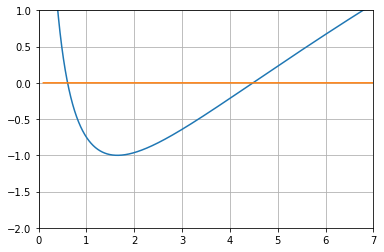

In [10]:
fx = np.arange(0.1, 35, 1e-3)
fy = f(fx)
plt.plot(fx, fy)
plt.plot(fx,[0 for i in range(len(fx))])
plt.grid(True)
plt.axis([0,7,-2,1])


Видим 2 корня. Один $-$ на отрезке $[0.1, 2.5]$, второй $-$ на отрезке $[2.5, 5]$

In [77]:
x1 = bisection(f, 0.1, 2.5, 1e-10)
x1

кол-во итераций =  35


0.606530659715645

In [78]:
f(x1)

-9.930500866062175e-12

In [79]:
x2 = bisection(f, 2.5, 5, 1e-10)
x2

кол-во итераций =  35


4.481689070307766

In [80]:
f(x2)

-1.3521406216909782e-11

In [16]:
#Проверка встроенным методом
x = sym.Symbol('x')
sym.solveset(sym.log(x)**2 - sym.log(x) - 3/4, x, domain = sym.S.Reals)

{0.606530659712633, 4.48168907033806}

In [18]:
g = lambda x :np.log(x)**2 - 3*np.log(x) + 9/4

[4.4, 4.6, -0.001, 0.001]

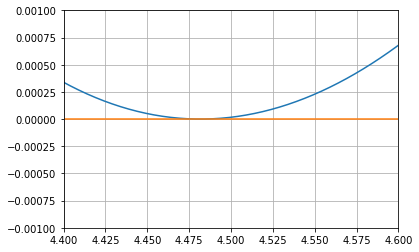

In [35]:
xx = np.arange(0.1, 35, 1e-3)
gy = g(xx)
plt.plot(xx, gy)
plt.plot(xx,[0 for i in range(len(xx))])
plt.grid(True)
plt.axis([4.4,4.6,-0.001,0.001])

данный корень имеет четную кратность, поэтому его нельзя найти с помощью метода бисекции

# Задача 2.2. 
Найти положительный корень уравнения $f(x)=0$ с точностью $\varepsilon=10^{-6}$,  двумя  способами:
     1. Использовать метод бисекции. Предварительно определить отрезок локализации  [a,b].
     2. Использовать метод Ньютона. В качестве начального приближения для метода Ньютона взять  середину отрезка локализации из п. а).
Сравнить число итераций в п. 1, 2.
<br>
$f(x) = e^x + 1 - \sqrt{9-x^2}$

In [36]:
def f1(x):
    return (np.e)**x + 1 - np.sqrt(9-x**2)

In [37]:
x = Symbol('x')
f1s = exp(x) + 1 - sqrt(9-x**2)

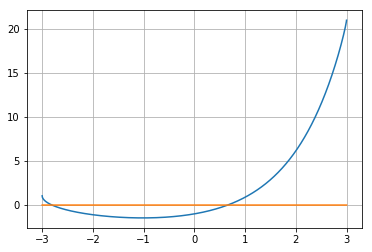

In [49]:
f1x = np.arange(-3, 3, 1e-3)
f1y = f1(f1x)
plt.plot(f1x, f1y)
plt.plot(f1x,[0 for i in range(len(f1x))])
plt.grid(True)

In [73]:
def newton(xstart, fun, eps):
    x0 = xstart
    k = 1
    xi = x0 - fun.evalf(subs={x:x0})/diff(fun,x).evalf(subs={x:x0})
    while abs(xi - x0) > eps:
        k+=1
        x0 = xi
        xi = x0 - fun.evalf(subs={x:x0})/diff(fun,x).evalf(subs={x:x0})
    print ('кол-во итераций = ',k)
    return float(xi)

In [74]:
x_appr_n = newton(0, f1s, 1e-6)
x_appr_n

кол-во итераций =  6


0.6561534966854013

In [81]:
x_appr_bis = bisection(f1, 0, 1, 1e-6)
x_appr_bis

кол-во итераций =  20


0.656153678894043

в методе бисекции итераций больше

# Задача 2.3
Локализовать корни уравнения $f(x)=0$ и найти их с точностью $\varepsilon=10^{-5}$, используя метод простой итерации. К виду $x=\phi(x)$, удобному для итераций, уравнение $f(x)=0$ привести двумя способами
1. Преобразовать уравнение к виду  $x=x-\alpha\:f(x)$,    где $\alpha=\frac{2}{M+m}$, $0<m\leq f'(x)\leq M$, а $x$ принадлежит отрезку    локализации $[a, b]$.
2. Любым  другим  преобразованием  уравнения. Проверить достаточное условие сходимости метода. 
<br>

Использовать критерий окончания итерационного процесса вида $\Bigr|\:x^{(n)}-x^{(n-1)}\:\Bigr|<\frac{1-q}{q}\varepsilon$, где:
<br>в  п. 1)  $q=\frac{M-m}{M+m}$, 
<br>в п. 2)  $q = \max\limits_{x\in[a,b]}\Bigr|\:\phi'(x)\:\Bigr|$.
<br>
Cравнить число итераций и значения величины $q$  в  п. 1),  2).
<br>
$f(x)=\sin(x+2)-x^2+2x-1$

In [44]:
def f3(x_): 
    return np.sin(x_+2) - x_**2 + 2*x_ - 1

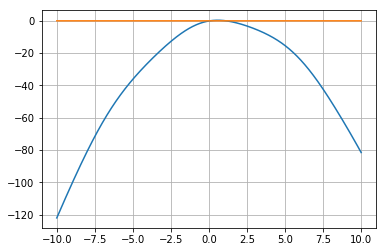

In [48]:
f3x = np.arange(-10, 10, 1e-3)
f3y = f3(f3x)
plt.plot(f3x, f3y)
plt.plot(f3x,[0 for i in range(len(f3x))])
plt.grid(True)

[-0.1, 1.2, -0.5, 0.5]

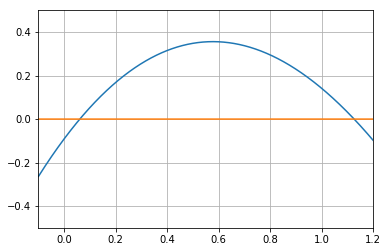

In [47]:
plt.plot(f3x, f3y)
plt.grid(True)
plt.plot(f3x,[0 for i in range(len(f3x))])
plt.axis([-0.1, 1.2, -0.5, 0.5])

In [50]:
def f3s(x): 
    return sin(x+2) - x**2 + 2*x - 1

Отрезки локализации: $[0,\:0.2]$, $[1,\:1.2]$

In [83]:
def fpit(fun, a, b, eps):
    k = 1
    m0 = sym.diff(fun(sym.Symbol('x')), sym.Symbol('x')).subs(sym.Symbol('x'), a).evalf()
    M0 = sym.diff(fun(sym.Symbol('x')), sym.Symbol('x')).subs(sym.Symbol('x'), b).evalf()
    m = abs(m0)
    M = abs(M0)
    if m > M:
        m, M = M, m
    q = (M - m)/(M + m)
    alpha = 2/(M0 + m0)
    print("q =", q)
    #Достаточное условие
    if q >= 1:
        print("q >= 1")
        return 0
    x0 = (a + b)/2
    x1 = x0 - alpha*fun(x0).evalf()
    while abs(x1 - x0) > (1 - q)/q*eps:
        k+=1
        x0 = x1
        x1 = x0 - alpha*fun(x0).evalf()
    print ('кол-во итераций = ',k)
    return x1

In [84]:
x1_pit = fpit(f3s, 0, 0.2, 1e-5)

q = 0.220530498568303
кол-во итераций =  4


In [85]:
x2_pit = fpit(f3s, 1, 1.2, 1e-5)

q = 0.170960287698064
кол-во итераций =  3


In [86]:
def newton_plus(func, a, b, eps):
    k = 1
    phidxc = np.arange(a, b, 1e-3)
    phidyc = np.arange(a, b, 1e-3)
    l = np.shape(phidxc)[0]
    i = 0
    while i < l:
        phidyc[i] = (func(sym.Symbol('x'))*sym.diff(func(sym.Symbol('x')), sym.Symbol('x'), 2)/(sym.diff(func(sym.Symbol('x')), sym.Symbol('x'))**2)).subs(sym.Symbol('x'), phidxc[i]).evalf()
        i += 1
    q = np.max(phidyc)
    print("q =", q)
    #Достаточное условие
    if q >= 1:
        print("q >= 1")
        return 0
    xstart = (a + b)/2
    x0 = xstart
    x1 = (x0 - func(x0)/sym.diff(func(sym.Symbol('x')), sym.Symbol('x')).subs(sym.Symbol('x'), x0)).evalf()
    while abs(x1 - x0) > (1 - q)/q*eps:
        k+=1
        x0 = x1
        x1 = (x0 - func(x0)/sym.diff(func(sym.Symbol('x')), sym.Symbol('x')).subs(sym.Symbol('x'), x0)).evalf()
    print ('кол-во итераций = ',k)
    return x1

In [87]:
x1_n = newton_plus(f3s, 0, 0.2, 1e-5)

q = 0.10519083390538364
кол-во итераций =  3


In [88]:
x2_n = newton_plus(f3s, 1, 1.2, 1e-5)

q = 0.09661988135603919
кол-во итераций =  3
